In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Load the cytometry df (assumed to be in CSV format)
# Replace 'df.csv' with the actual data file path
df = pd.read_csv('/content/drive/MyDrive/data.csv')

# **EDA** **TECHNIQUES**

In [ ]:
print(df.columns)

Index(['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19',
       'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')


In [ ]:
# Display the first few rows of the dataset
print(df.head())

     Time  Cell_length        DNA1        DNA2    CD45RA     CD133      CD19  \
0  2693.0           22  201.783295  253.016647  0.817049 -0.147947 -0.033482   
1  3736.0           35  191.828598  308.869080  3.801385 -0.191446 -0.083274   
2  7015.0           32  116.111923  200.839218  3.204439 -0.161106  0.369613   
3  7099.0           29  176.248505  313.022461  2.237382 -0.138071 -0.088311   
4  7700.0           25  133.332779  226.467758 -0.044047 -0.151509  0.402548   

       CD22     CD11b       CD4  ...     CD117      CD49d     HLA-DR  \
0  0.332183 -0.045922  1.858334  ...  0.265375   4.804858  12.734092   
1  0.372388  4.494379 -0.177158  ...  0.448901   0.995556   2.558165   
2 -0.214952 -0.009404 -0.043904  ...  0.231194  33.025459   8.574364   
3 -0.220430  4.006598 -0.095335  ...  0.332596   8.879428   0.704930   
4  2.581769  6.742060  2.906627  ... -0.031117   0.909562   0.993077   

       CD64      CD41  Viability  file_number  event_number  label  individual  
0 -0.

In [ ]:
# Display the structure and data types of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          265627 non-null  float64
 1   Cell_length   265627 non-null  int64  
 2   DNA1          265627 non-null  float64
 3   DNA2          265627 non-null  float64
 4   CD45RA        265627 non-null  float64
 5   CD133         265627 non-null  float64
 6   CD19          265627 non-null  float64
 7   CD22          265627 non-null  float64
 8   CD11b         265627 non-null  float64
 9   CD4           265627 non-null  float64
 10  CD8           265627 non-null  float64
 11  CD34          265627 non-null  float64
 12  Flt3          265627 non-null  float64
 13  CD20          265627 non-null  float64
 14  CXCR4         265627 non-null  float64
 15  CD235ab       265627 non-null  float64
 16  CD45          265627 non-null  float64
 17  CD123         265627 non-null  float64
 18  CD32

In [ ]:
# Get summary statistics of numerical columns
print(df.describe())

                Time    Cell_length           DNA1           DNA2  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean   272948.344831      34.450572     641.595743     933.466175   
std    171220.139145      11.446694     865.915665    1140.667186   
min         1.000000      10.000000      40.405746      23.133020   
25%    120196.000000      26.000000     101.058731     205.195770   
50%    253276.000000      33.000000     139.504501     274.409729   
75%    424502.500000      41.000000    1435.977539    2170.162109   
max    709122.437500      65.000000    2745.666504    4396.652344   

              CD45RA          CD133           CD19           CD22  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        4.931193       0.793498       5.271011       4.163378   
std        11.441369       1.959306      12.016138      12.033168   
min        -0.286683      -0.290567      -0.290608      -0.286868   
25%         1.030280      -0.1146

In [ ]:
missing_labels = df['label'].isnull().sum()
total_rows = len(df)
labeled_rows = total_rows - missing_labels

In [ ]:
if missing_labels > 0 and labeled_rows > 0:
  print("the dataset is semi_supervised.")
  print(f"total rows:{total_rows}")
  print(f" labeled rows:{labeled_rows}")
  print(f"unlabeled rows: {missing_labels}")
else:
  print("the dataset is not semi-supervised.")

the dataset is semi_supervised.
total rows:265627
 labeled rows:104184
unlabeled rows: 161443


In [ ]:
df['Viability']

0         3.474168
1         2.956692
2         3.443209
3        -0.132632
4         1.435457
            ...   
265622    1.195905
265623   -0.017502
265624    0.537059
265625    3.307683
265626    1.577387
Name: Viability, Length: 265627, dtype: float64

In [ ]:
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

In [ ]:
plot_data = pd.DataFrame({
    'Null Values': null_counts,
    'Non-Null Values' : non_null_counts
})

In [ ]:
#calculate label and unlabel percentage
label_count = df['label'].count()
unlabel_count = df['label'].isna().sum()

label_percentage = (label_count / len(df)) * 100
unlabel_percentage = (unlabel_count / len(df)) * 100

print(f"Label percentage: {label_percentage:.2f}%")
print(f"Unlabel percentage: {unlabel_percentage:.2f}%")

Label percentage: 39.22%
Unlabel percentage: 60.78%


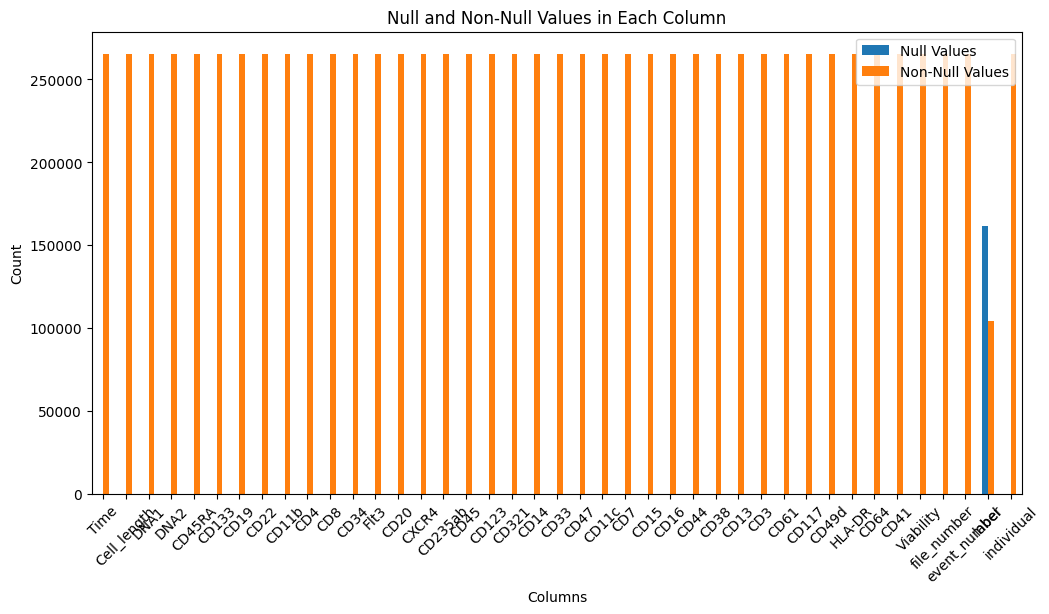

In [ ]:
df = pd.DataFrame(df)
null_values = df.isnull().sum()
non_null_values = df.notnull().sum()
plot_data = pd.DataFrame({
    'Null Values': null_values,
    'Non-Null Values': non_null_values
})
plot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Null and Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [ ]:
df = df.drop(columns=['Time','individual','file_number','event_number',])

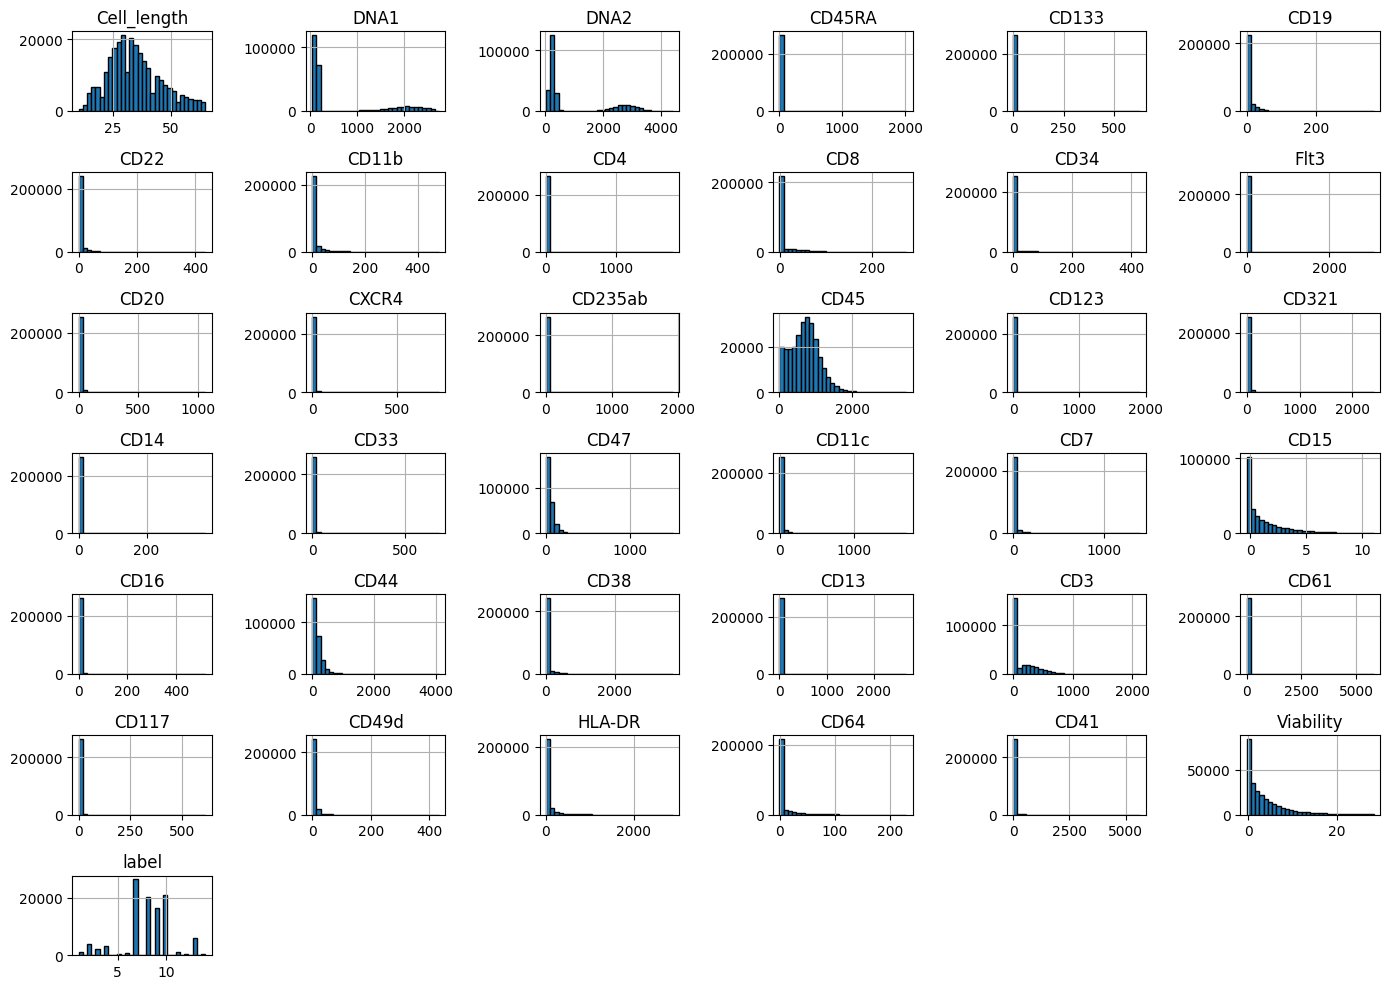

In [ ]:
# Plot histograms for all numerical columns
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

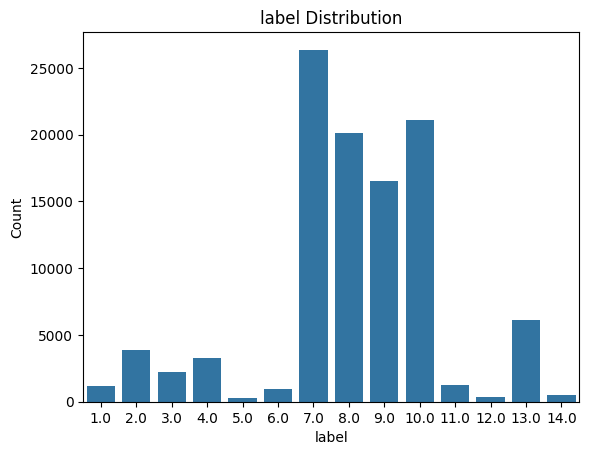

In [ ]:
# Countplot for another column in the dataset
sns.countplot(data=df, x='label')
plt.title('label Distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

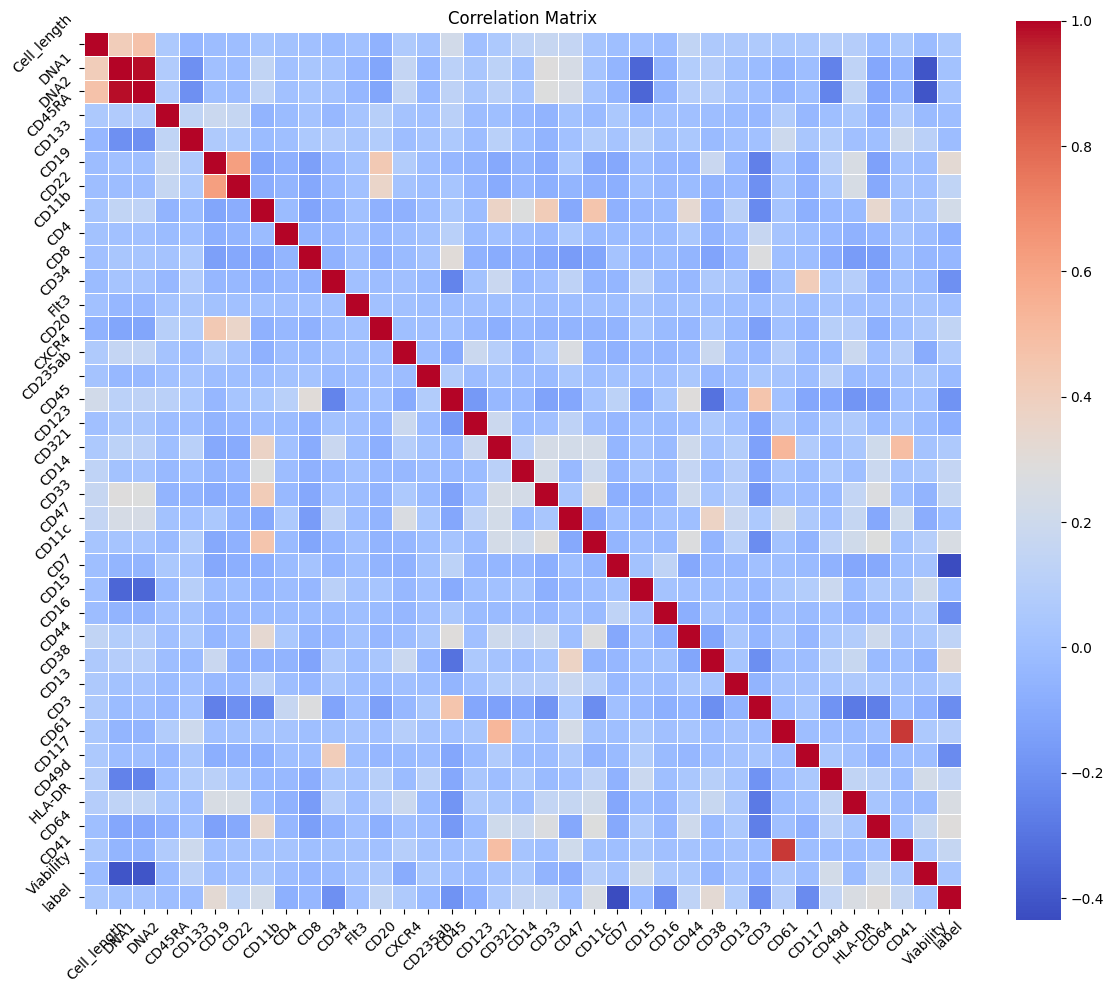

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame to store max, min, and range values
summary_df = pd.DataFrame({
    'Max': df[numerical_columns].max(),
    'Min': df[numerical_columns].min(),
    'Range': df[numerical_columns].max() - df[numerical_columns].min()
})

# Display the summary DataFrame
print("Summary of Max, Min, and Range for Each Numerical Column:")
print(summary_df)


Summary of Max, Min, and Range for Each Numerical Column:
                     Max        Min        Range
Cell_length    65.000000  10.000000    55.000000
DNA1         2745.666504  40.405746  2705.260757
DNA2         4396.652344  23.133020  4373.519323
CD45RA       2013.210327  -0.286683  2013.497010
CD133         628.772461  -0.290567   629.063028
CD19          367.355286  -0.290608   367.645893
CD22          435.604523  -0.286868   435.891391
CD11b         481.570679  -0.291343   481.862022
CD4          1804.521118  -0.288916  1804.810034
CD8           273.117188  -0.290179   273.407366
CD34          430.201294  -0.290203   430.491497
Flt3         3082.859619  -0.289583  3083.149203
CD20         1061.773926  -0.290826  1062.064752
CXCR4         744.679260  -0.285367   744.964627
CD235ab      1925.590210  -0.288219  1925.878429
CD45         3478.533936  18.906206  3459.627729
CD123        1913.932373  -0.290179  1914.222552
CD321        2401.089355  -0.267886  2401.357241
CD14       

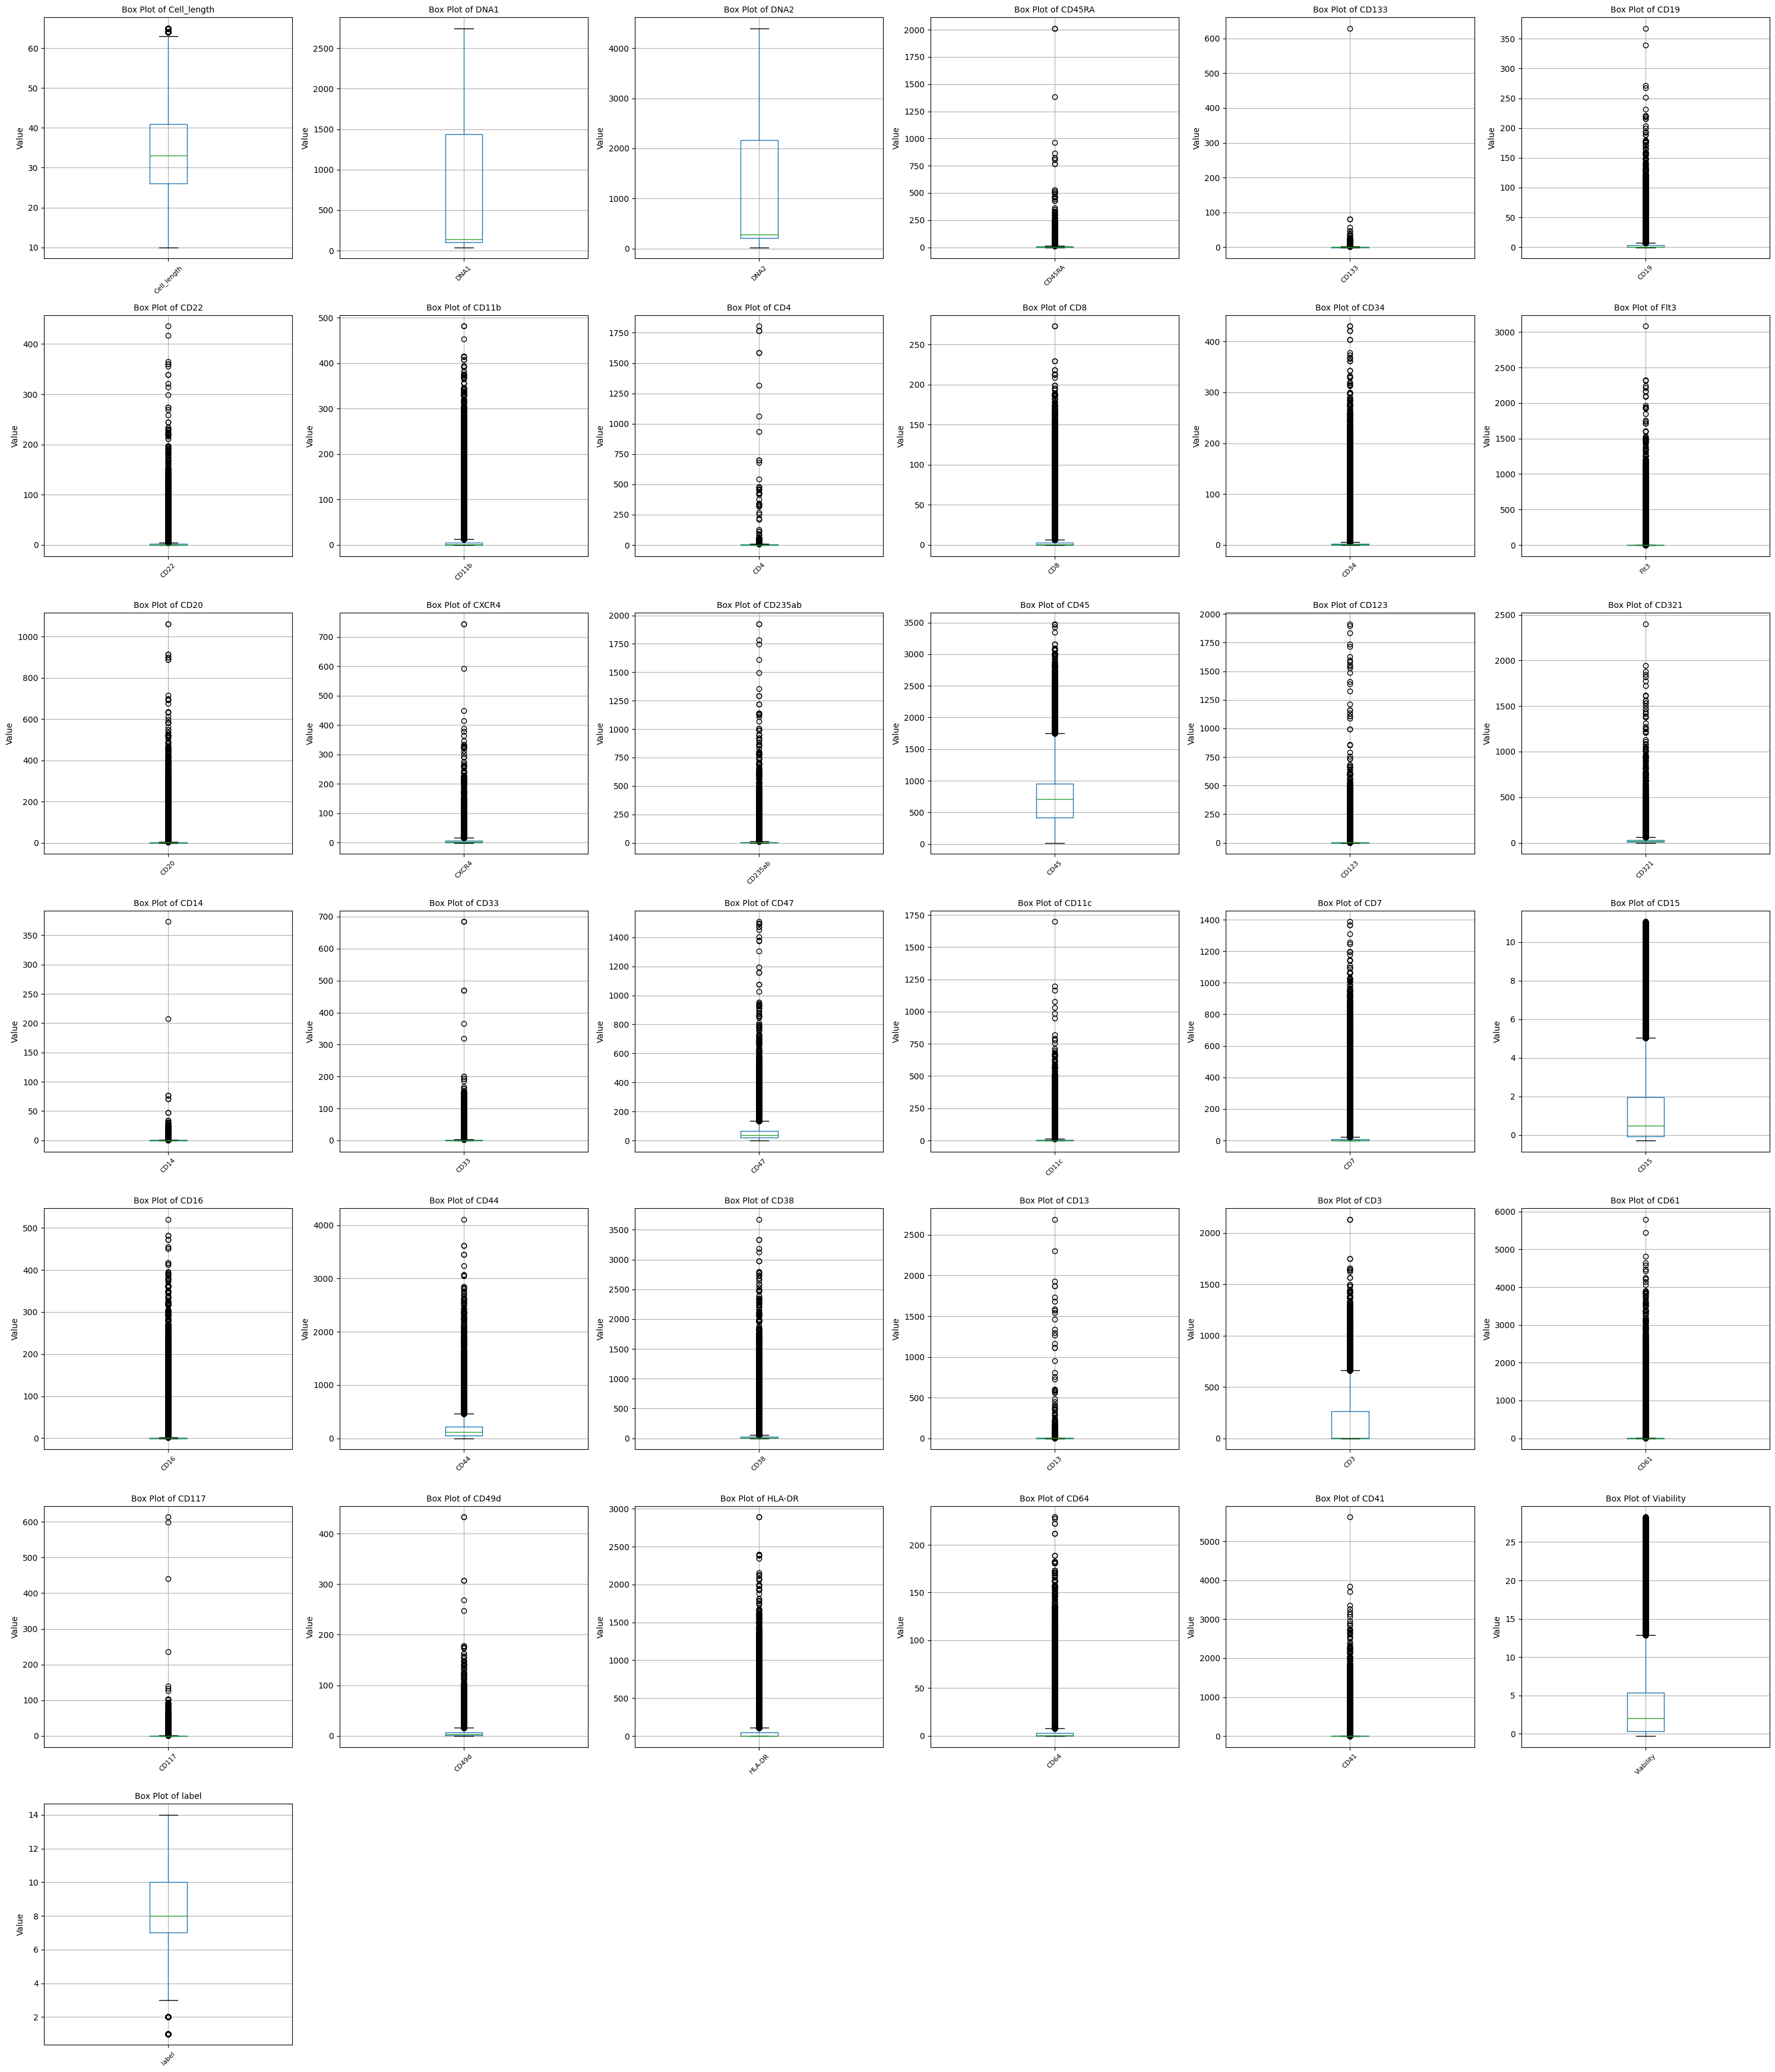

In [ ]:
n_cols = 6  # You can adjust this to 7, 8, 9, or 10 as needed
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set a suitable figure size
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust height and width based on n_cols and n_rows

# Filter to include only valid numerical columns
valid_numerical_columns = [col for col in numerical_columns if col in df.columns]

# Loop through each valid numerical column to create individual box plots
for i, column in enumerate(valid_numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a grid of subplots
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# **PAIR** **PLOT**

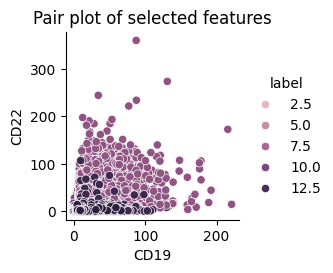

In [ ]:
#pairplot
sns.pairplot(df, hue='label',x_vars=['CD19'],y_vars=['CD22'])
plt.title('Pair plot of selected features')
plt.show()

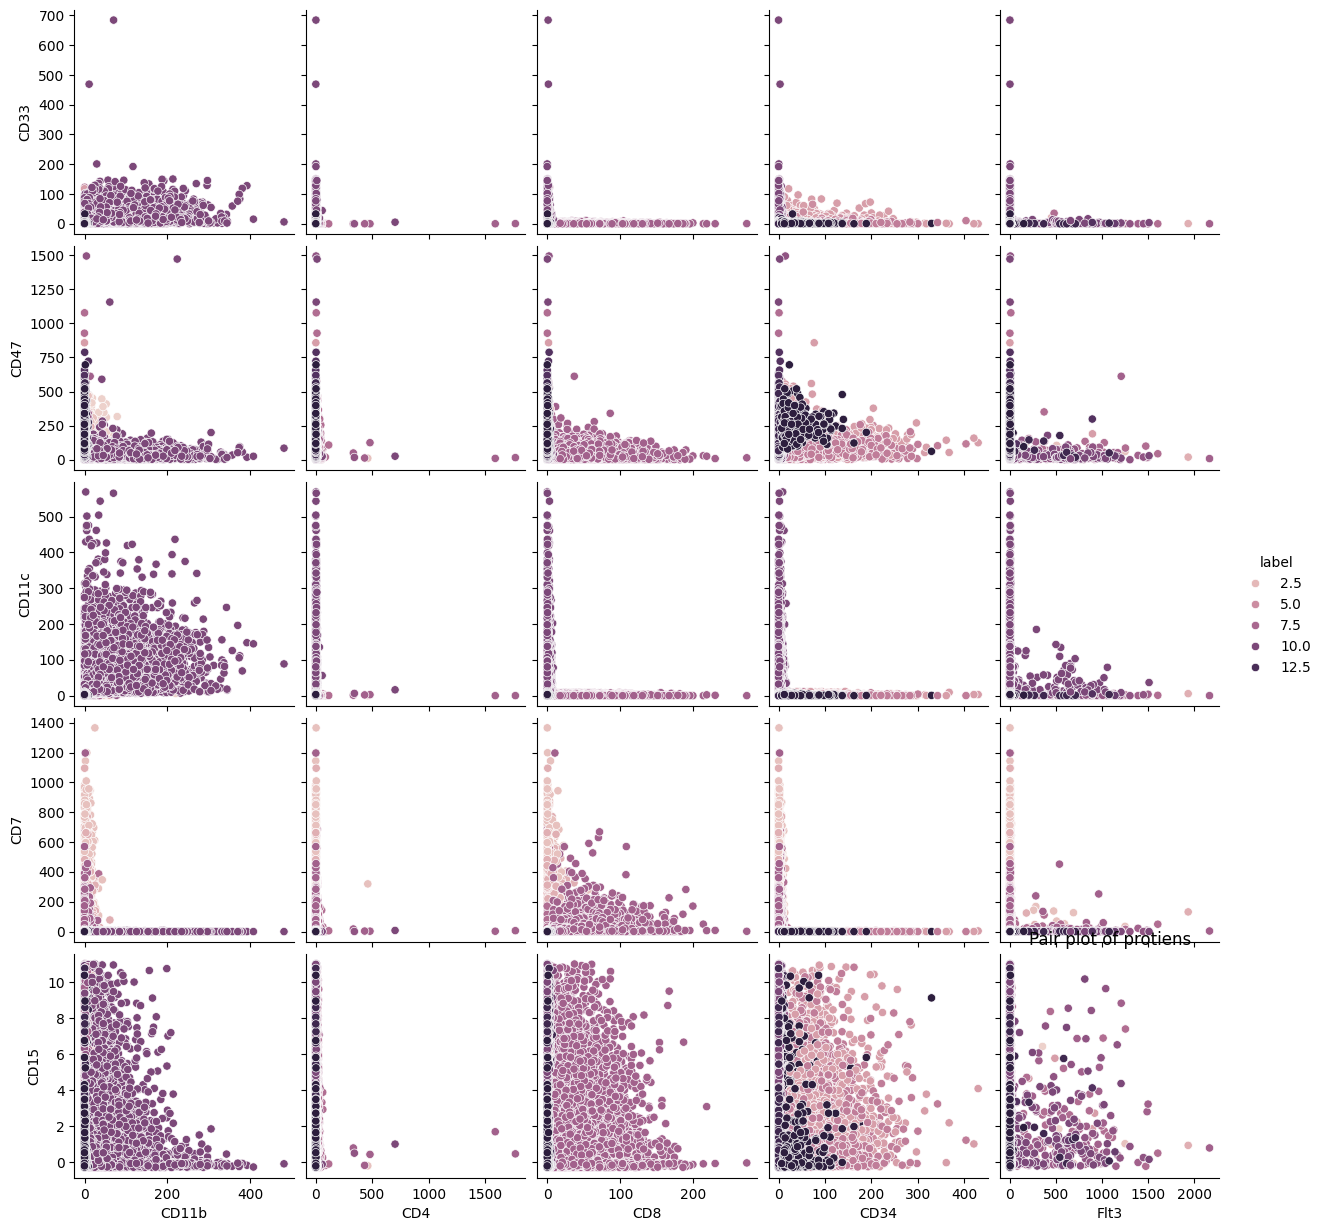

In [ ]:
sns.pairplot(df, hue='label', x_vars=['CD11b', 'CD4', 'CD8', 'CD34', 'Flt3'], y_vars=['CD33', 'CD47', 'CD11c', 'CD7', 'CD15'])
plt.title('Pair plot of protiens')
plt.show()

## **SKEWNESS**

               Skewness                   Category
Cell_length    0.527832               Right-skewed
DNA1           1.155424               Right-skewed
DNA2           1.108669               Right-skewed
CD45RA        65.251655               Right-skewed
CD133        126.096395               Right-skewed
CD19           4.007221               Right-skewed
CD22           6.131244               Right-skewed
CD11b          5.264678               Right-skewed
CD4          114.022325               Right-skewed
CD8            3.313920               Right-skewed
CD34           8.397363               Right-skewed
Flt3          26.230625               Right-skewed
CD20          10.655454               Right-skewed
CXCR4         14.332247               Right-skewed
CD235ab       35.288190               Right-skewed
CD45           0.514492               Right-skewed
CD123         13.956222               Right-skewed
CD321         15.415273               Right-skewed
CD14          74.327532        

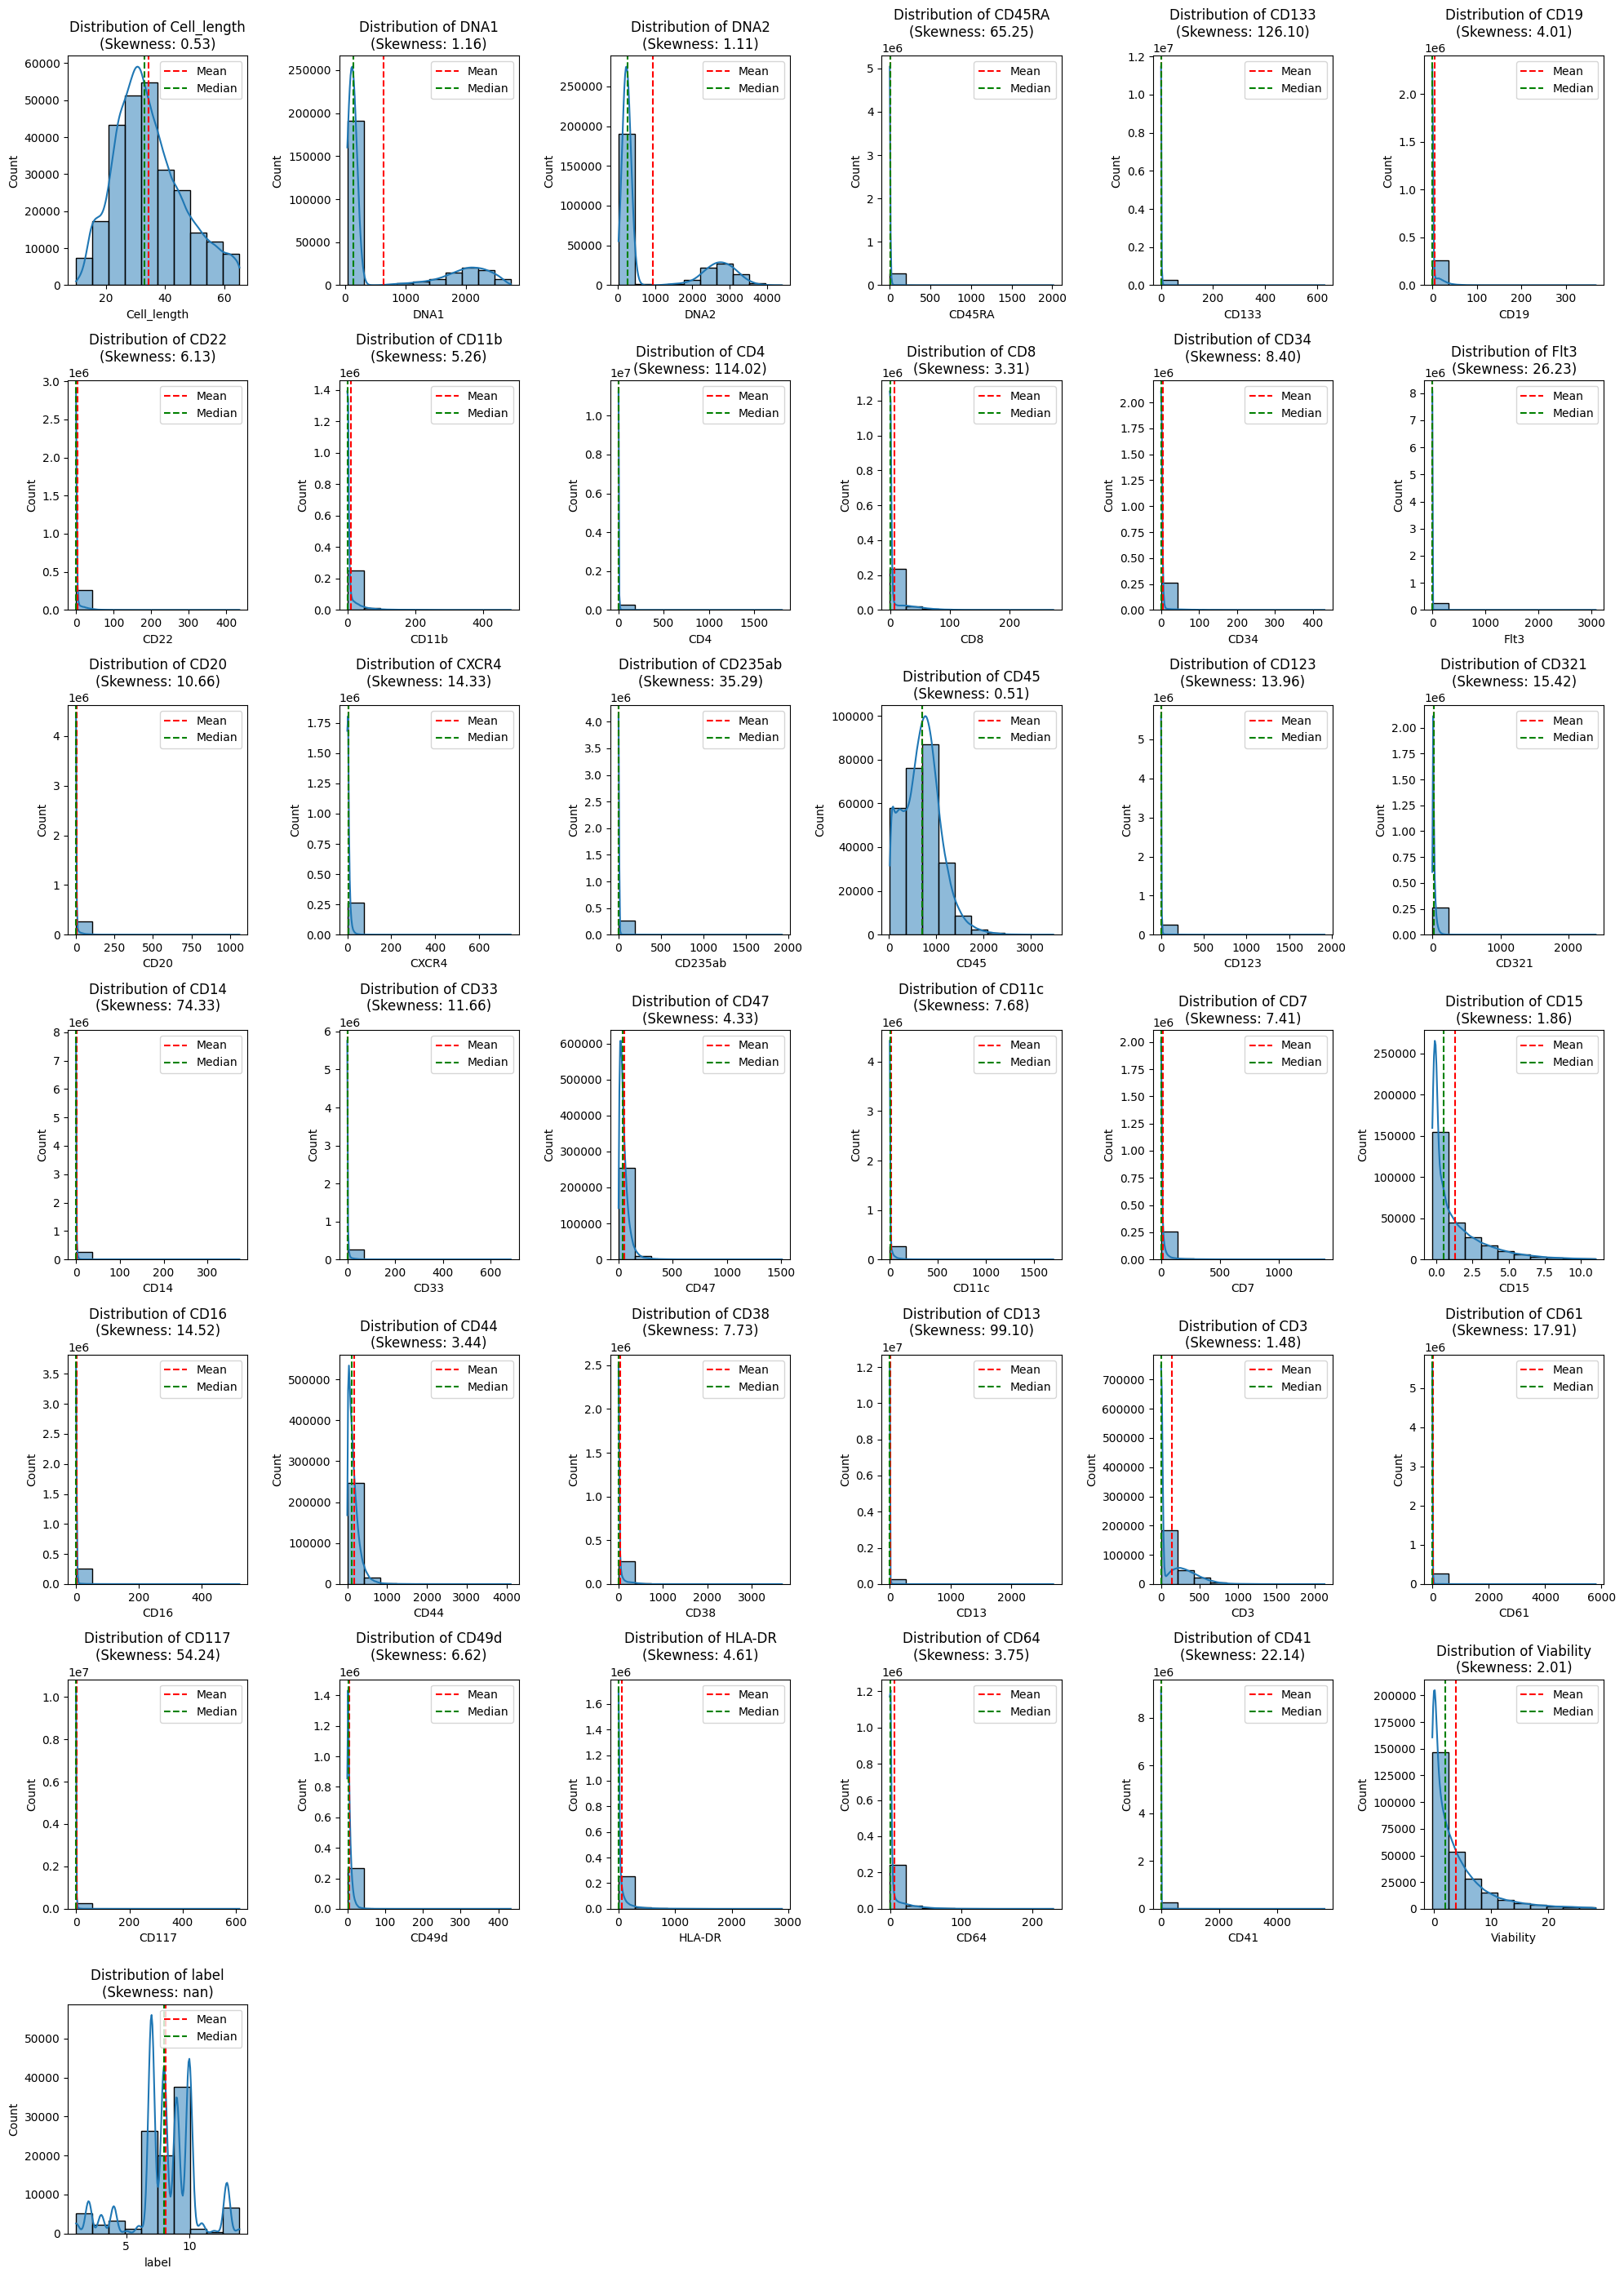

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

skewness = df.apply(skew)
# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_data = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_data)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten to make it easier to iterate through

# Plot histograms for each numerical column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}\n(Skewness: {skewness[col]:.2f})')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# **KURTOSIS**

                  Column      Kurtosis                   Category
Cell_length  Cell_length      2.834033  Platykurtic (light tails)
DNA1                DNA1      2.534998  Platykurtic (light tails)
DNA2                DNA2      2.427060  Platykurtic (light tails)
CD45RA            CD45RA   8914.445042  Leptokurtic (heavy tails)
CD133              CD133  39762.277510  Leptokurtic (heavy tails)
CD19                CD19     33.044641  Leptokurtic (heavy tails)
CD22                CD22     76.673855  Leptokurtic (heavy tails)
CD11b              CD11b     41.254044  Leptokurtic (heavy tails)
CD4                  CD4  17443.057242  Leptokurtic (heavy tails)
CD8                  CD8     16.299477  Leptokurtic (heavy tails)
CD34                CD34     95.275706  Leptokurtic (heavy tails)
Flt3                Flt3    862.869549  Leptokurtic (heavy tails)
CD20                CD20    206.215616  Leptokurtic (heavy tails)
CXCR4              CXCR4    577.158590  Leptokurtic (heavy tails)
CD235ab   

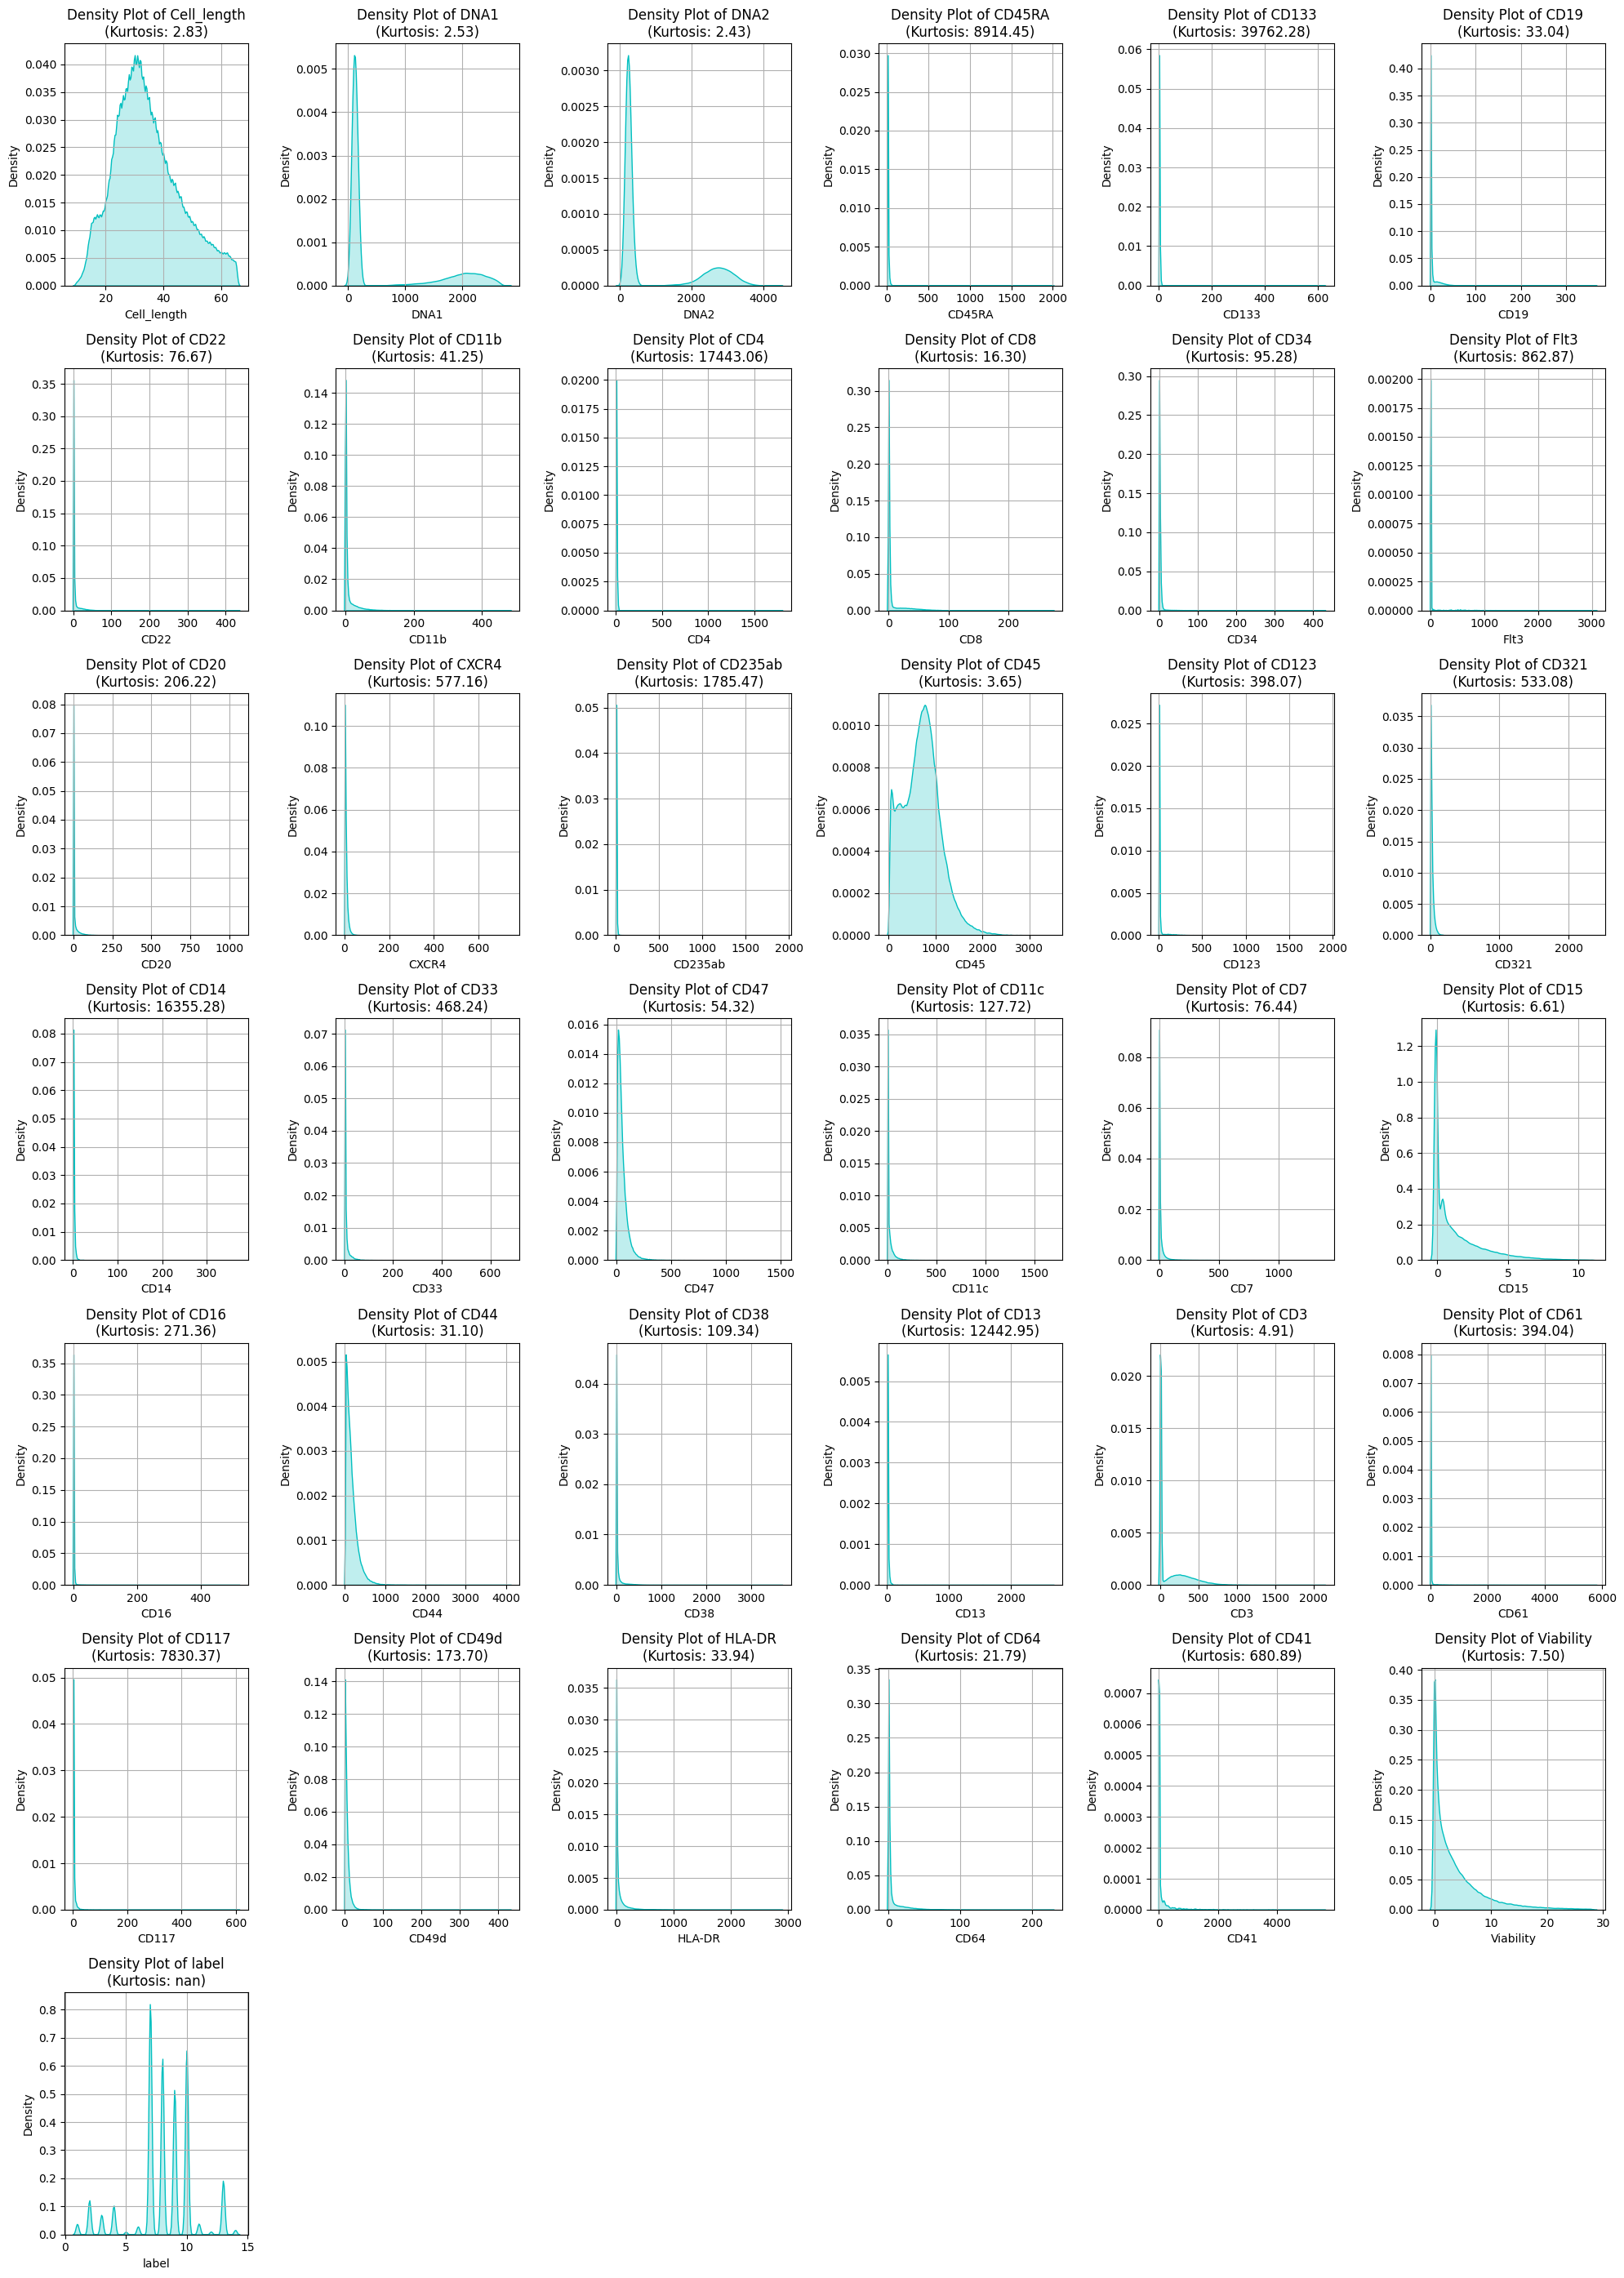

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurtosis_values = df.apply(kurtosis, fisher=False)  # Pearson kurtosis (normal = 3)

# Create a DataFrame with kurtosis values
kurtosis_data = pd.DataFrame({'Column': df.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_data['Category'] = kurtosis_data['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_data)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten the axes array to make iteration easier

# Plot density for each column
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column].dropna(), color='c', fill=True, bw_adjust=0.5, ax=axes[i])  # Adjust bandwidth for smoothness
    axes[i].set_title(f'Density Plot of {column}\n(Kurtosis: {kurtosis_data.loc[kurtosis_data["Column"] == column, "Kurtosis"].values[0]:.2f})')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# **DIMENSIONALITY REDUCTION TECHNIQUES**

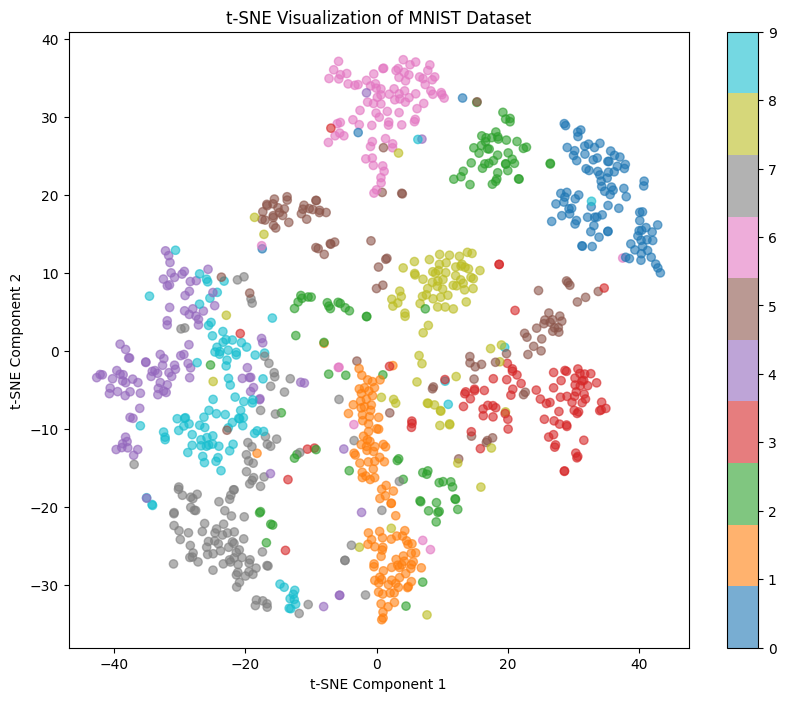

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
train_images_tsne = tsne.fit_transform(train_images_flat)

# plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)


scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

#  Display the first few rows of the standardized data
print(scaled_df.head())


   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0    -1.087702 -0.507917 -0.596538 -0.359586 -0.480500 -0.441448 -0.318387   
1     0.047999 -0.519413 -0.547573 -0.098748 -0.502701 -0.445592 -0.315046   
2    -0.214086 -0.606854 -0.642281 -0.150922 -0.487216 -0.407902 -0.363856   
3    -0.476171 -0.537406 -0.543932 -0.235445 -0.475460 -0.446011 -0.364311   
4    -0.825617 -0.586967 -0.619812 -0.434847 -0.482318 -0.405161 -0.131438   

      CD11b       CD4       CD8  ...      CD13       CD3      CD61     CD117  \
0 -0.382586 -0.057993 -0.268048  ... -0.157433 -0.700033 -0.093096 -0.162827   
1 -0.205503 -0.258936 -0.417377  ...  0.499854 -0.700297 -0.028700 -0.110416   
2 -0.381161 -0.245781 -0.416052  ... -0.099152 -0.691336 -0.082651 -0.172589   
3 -0.224527 -0.250858 -0.399418  ...  0.007122 -0.697778 -0.094615 -0.143630   
4 -0.117838  0.045494 -0.406103  ...  0.034325 -0.695909 -0.086249 -0.247499   

      CD49d    HLA-DR      CD64      CD41  Viabili

# **2D PCA**

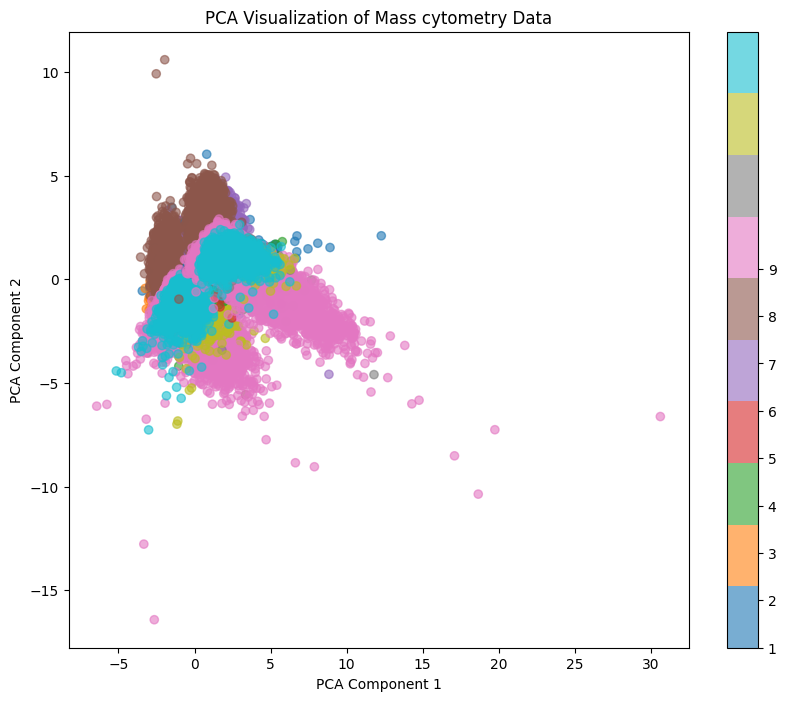

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Columns to exclude from the analysis
exclude_columns = ['Time', 'file_number', 'event_number', 'label', 'individual']

# Dropping the columns to exclude
data_filtered = df.drop(columns = exclude_columns,errors='ignore')

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['label'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('PCA Visualization of Mass cytometry Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# **3D PCA**

Standard deviation: [2.0782159  1.9923657  1.62480039 1.5499179 ]
Proportion of Variance: [0.11365697 0.10446069 0.0694728  0.06321675]
Cumulative Proportion: [0.11365697 0.21811766 0.28759046 0.35080721]


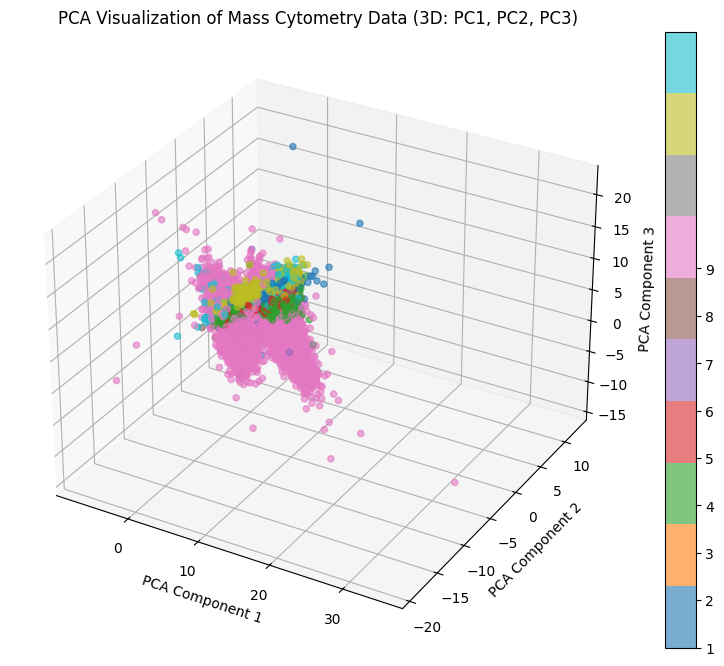

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Columns to exclude from the analysis
exclude_columns = ['Event', 'Time', 'file_number', 'event_number', 'label', 'individual']

# Dropping the columns to exclude
data_filtered = df.drop(columns=exclude_columns, errors='ignore')

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]
df['PCA3'] = pca_results[:, 2]
df['PCA4'] = pca_results[:, 3]

# Print the PCA results (Standard deviation, Proportion of variance, and Cumulative Proportion)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
standard_deviation = pca.singular_values_ / np.sqrt(len(data_filtered) - 1)

print(f"Standard deviation: {standard_deviation}")
print(f"Proportion of Variance: {explained_variance}")
print(f"Cumulative Proportion: {cumulative_variance}")

# Plotting the PCA results in 3D (PC1, PC2, PC3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['label'], cmap='tab10', alpha=0.6)

# Add labels and title
ax.set_title('PCA Visualization of Mass Cytometry Data (3D: PC1, PC2, PC3)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Adding color bar
plt.colorbar(scatter, ticks=range(10))

plt.show()

# **TSNE**

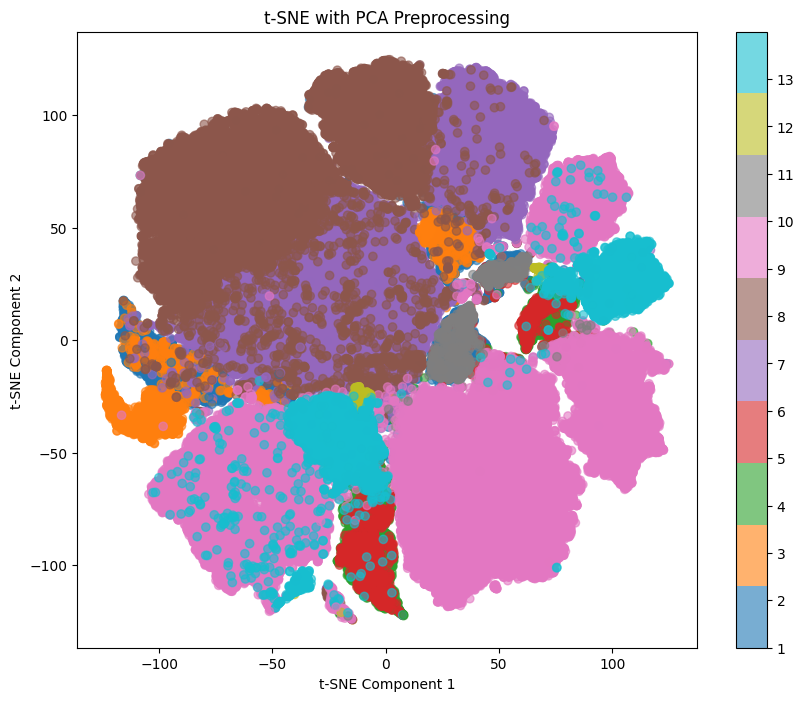

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Apply PCA (e.g., reducing to 20 components)
pca = PCA(n_components=20)
pca_results = pca.fit_transform(scaled_data)

# Step 2: Apply t-SNE on PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_results)

# Step 3: Add t-SNE results to the dataframe
df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['label'], cmap='tab10', alpha=0.6)

# Adjust colorbar ticks if needed (based on the unique values in 'label')
num_classes = df['label'].nunique()  # Determine the number of unique classes
plt.colorbar(scatter, ticks=range(num_classes))

plt.title('t-SNE with PCA Preprocessing')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


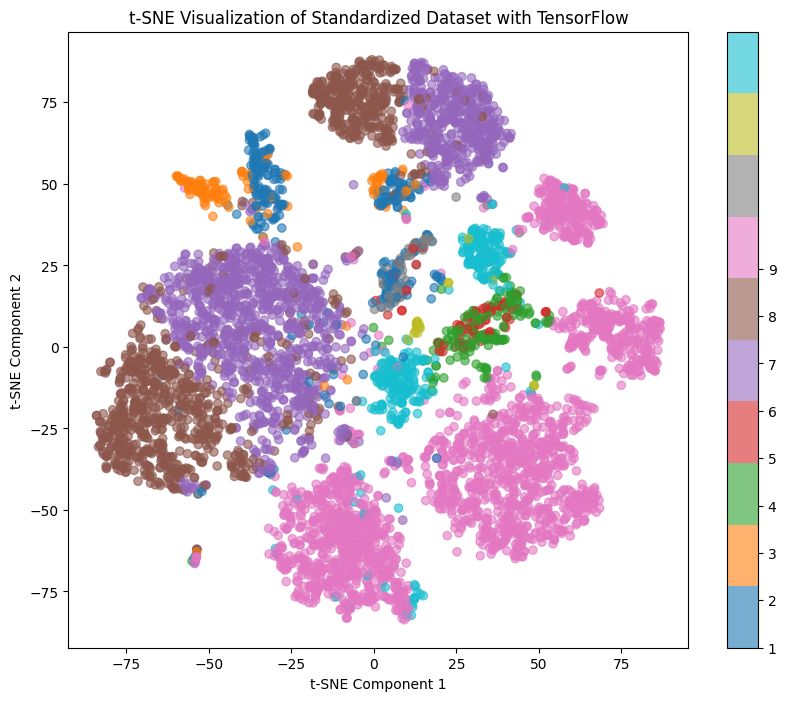

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sample_df = df.sample(n=15000, random_state=42)  # Reduce the sample size to 1000 rows

# Columns to exclude from the analysis
exclude_columns = ['Time', 'file_number', 'event_number', 'label', 'individual']
features = sample_df.drop(columns = exclude_columns, errors = 'ignore')
labels = sample_df['label']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to TensorFlow tensor
features_tf = tf.convert_to_tensor(features_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features_tf)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Standardized Dataset with TensorFlow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# **BINARY** **MASKING**

In [ ]:
import pandas as pd
import numpy as np

data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500],
    'D': [1000, 2000, 3000, 4000, 5000],
    'E': [10000, 20000, 30000, 40000, 50000]
}
x = pd.DataFrame(data)

m = pd.DataFrame(np.random.binomial(1, 0.5, x.shape), columns=x.columns)
x_shuffled = x.apply(np.random.permutation)
x_corrupted = x * (1 - m) + x_shuffled * m

print("Original DataFrame (x):")
print(x)
print("\nBinary Mask (m):")
print(m)
print("\nShuffled DataFrame (x_shuffled):")
print(x_shuffled)
print("\nCorrupted DataFrame (x_corrupted):")
print(x_corrupted)


Original DataFrame (x):
   A   B    C     D      E
0  1  10  100  1000  10000
1  2  20  200  2000  20000
2  3  30  300  3000  30000
3  4  40  400  4000  40000
4  5  50  500  5000  50000

Binary Mask (m):
   A  B  C  D  E
0  0  1  0  0  1
1  0  1  0  1  1
2  0  1  1  0  1
3  1  1  0  1  1
4  1  0  0  0  0

Shuffled DataFrame (x_shuffled):
   A   B    C     D      E
0  3  50  100  3000  20000
1  5  30  300  5000  40000
2  2  10  200  4000  10000
3  1  40  500  1000  30000
4  4  20  400  2000  50000

Corrupted DataFrame (x_corrupted):
   A   B    C     D      E
0  1  50  100  1000  20000
1  2  30  200  5000  40000
2  3  10  200  3000  10000
3  1  40  400  1000  30000
4  4  50  500  5000  50000


# **LABEL AND UNLABEL DATA**

In [ ]:
# Separate labeled and unlabeled data based on non-NaN and NaN values in the 'label' column
df_labeled = df[df['label'].notnull()]
df_unlabeled = df[df['label'].isnull()]

# Print the shapes of labeled and unlabeled data
print("Labeled Data Shape:", df_labeled.shape)
print("Unlabeled Data Shape:", df_unlabeled.shape)


Labeled Data Shape: (104184, 37)
Unlabeled Data Shape: (161443, 37)


In [ ]:
from sklearn.model_selection import train_test_split
# Separate labeled and unlabeled data
df_labeled = df[df['label'].notnull()]  # Labeled data
df_unlabeled = df[df['label'].isnull()]  # Unlabeled data

# Separate features and target for labeled data
x_labeled = df_labeled.drop(columns=['label'])  # Features
y_labeled = df_labeled['label']                  # Target

# Separate features for unlabeled data
x_unlabeled = df_unlabeled.drop(columns=['label'])  # Features (no labels)

# Split the labeled data into training and testing sets (e.g., 70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

print("\nTraining Features (x_train):\n", x_train.head())
print("\nTraining Labels (y_train):\n", y_train.head())
print("\nTesting Features (x_test):\n", x_test.head())
print("\nTesting Labels (y_test):\n", y_test.head())



Training Features (x_train):
        Cell_length         DNA1         DNA2    CD45RA     CD133       CD19  \
64113           25   123.413055   247.264938  5.697453  1.537298   0.776895   
82744           31  1824.911621  2485.373047  2.224972 -0.264615  -0.188495   
24294           41    86.404358   217.855179  1.931000  1.104188   1.239756   
7820            38   185.181335   329.612823  1.003372  0.504241  -0.129074   
43295           26   160.022964   322.868805  4.651943  0.963454  18.185394   

            CD22      CD11b        CD4       CD8  ...       CD38      CD13  \
64113  -0.058380  60.027130  10.251992  0.431582  ...  11.419551  2.495952   
82744  -0.148595  -0.204285   5.235657  0.111536  ...   7.848042  0.504241   
24294   0.972672   0.375968   5.396508 -0.224139  ...   2.532004  0.233915   
7820   -0.014492   9.928773  -0.067003 -0.005058  ...   8.012162  3.995450   
43295  73.916107   0.900901   0.577431 -0.054818  ...  44.547649  1.760873   

              CD3      CD

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the unlabeled data
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)

# Convert back to a DataFrame if needed (optional, for better readability)
x_unlabeled_scaled = pd.DataFrame(x_unlabeled_scaled, columns=x_unlabeled.columns)



In [ ]:
from sklearn.model_selection import train_test_split
df_labeled = df[df['label'].notnull()]  # Labeled data
df_unlabeled = df[df['label'].isnull()]  # Unlabeled data

# Separate features and target for labeled data
X_labeled = df_labeled.drop(columns=['label'])  # Features
y_labeled = df_labeled['label']                  # Target


# Split the labeled data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Training Labels (y_train):", y_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)



Shape of Training Features (X_train): (72928, 36)
Shape of Training Labels (y_train): (72928,)
Shape of Testing Features (X_test): (31256, 36)


# **LOGISTIC** **REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def logit(x_train, y_train, x_test):
    """Logistic Regression.

    Args:
        x_train: Training features.
        y_train: Training labels.
        x_test: Testing features.

    Returns:
        y_test_hat: Predicted probabilities for x_test.
    """
    # Convert labels into proper format
    if len(y_train.shape) > 1:
        y_train = donvert_matrix_to_vector(y_train)

    # Define and fit the model on the training dataset
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_hat = model.predict_proba(x_test)

    return y_test_hat


In [ ]:
y_test_prob = logit(X_train, y_train, X_test)

# Display the probabilities
print("Predicted probabilities for the test set:")
print(y_test_prob)

# Compute log loss
log_loss_value = log_loss(y_test, y_test_prob)

# Display log loss
print("Log loss for the test set:", log_loss_value)


Predicted probabilities for the test set:
[[2.93053808e-05 3.22846566e-05 2.78878703e-06 ... 1.75775278e-09
  6.14394193e-06 3.18164269e-08]
 [8.83392975e-09 3.35515326e-06 3.64007159e-06 ... 2.91895204e-15
  3.22644629e-04 4.00574836e-11]
 [1.65511863e-04 8.12963879e-03 8.50978569e-04 ... 1.99688207e-10
  2.72473142e-04 1.29397957e-08]
 ...
 [4.46704372e-15 1.17228548e-08 6.82366956e-09 ... 4.83200945e-29
  6.62346247e-13 6.43624837e-26]
 [2.56534586e-05 4.45416141e-03 1.48594627e-03 ... 2.30345258e-11
  1.09901623e-03 5.05806868e-09]
 [2.07780642e-06 4.04643972e-02 2.39748230e-03 ... 2.81683714e-17
  6.00590797e-05 1.82812479e-15]]
Log loss for the test set: 0.2049565078468224


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **XG BOOST**

In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import numpy as np

def xgboost_model(x_train, y_train, x_test):
    """XGBoost Classifier.

    Args:
        x_train: Training features.
        y_train: Training labels.
        x_test: Testing features.

    Returns:
        y_test_prob: Predicted probabilities for x_test.
    """
    # Convert labels to proper format and zero-based index if necessary
    if len(y_train.shape) > 1:
        y_train = donvert_matrix_to_vector(y_train)

    y_train = y_train.astype(int) - 1  # Convert to integer and zero-based index

    # Define and fit the XGBoost model on the training dataset
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_prob = model.predict_proba(x_test)

    return y_test_prob

# Example usage
# Assuming y_test is the true labels for X_test
y_test_zero_based = y_test.astype(int) - 1  # Adjust y_test for log loss calculation
y_test_prob = xgboost_model(X_train, y_train, X_test)

# Display the probabilities
print("Predicted probabilities for the test set:")
print(y_test_prob)

# Compute log loss
log_loss_value = log_loss(y_test_zero_based, y_test_prob)
print("Log loss for the test set:", log_loss_value)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Predicted probabilities for the test set:
[[5.2870575e-07 5.5549259e-07 4.4547227e-07 ... 8.4330856e-07
  8.0272923e-07 6.2187780e-07]
 [8.2367842e-07 1.8141062e-06 6.8722528e-07 ... 1.0766731e-06
  1.7258326e-05 2.1068540e-06]
 [5.5205066e-07 8.6178414e-07 5.8480362e-07 ... 1.0324942e-06
  4.2642719e-06 9.2441218e-07]
 ...
 [6.5520271e-07 4.6091463e-06 9.3846472e-07 ... 5.8767739e-07
  5.1200971e-07 4.5345195e-07]
 [2.7839903e-06 3.2294638e-06 2.5266534e-06 ... 4.5210136e-06
  1.0395867e-05 3.4572942e-05]
 [8.4335568e-07 7.6935595e-07 6.7999758e-07 ... 6.8546416e-07
  3.8635189e-06 9.1242248e-07]]
Log loss for the test set: 0.00394913549174777


# **ENCODER**

In [ ]:
def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m for corruption."""
    return pd.DataFrame(np.random.binomial(1, p_m, data.shape), columns=data.columns)

def x_corruption(mask, data):
    """Applies corruption to the data using the mask."""
    shuffled = data.apply(lambda col: np.random.permutation(col))
    return data * (1 - mask) + shuffled * mask

In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
from keras import models
import numpy as np

def self_supervised(x_unlabeled_scaled,p_m, alpha, parameters):

  # extract the batch_size and epochs
  epochs = parameters['epochs']
  batch_size = parameters['batch_size']
  _,dimension = x_unlabeled_scaled.shape

  # model creation
  # defining an encoder
  # auto encoder ---> corrupted input ---> encoder ----> latent space ---> decoder
  # working on the encoder part and extracting the latent space
  # creating a fully connecting network with the number of neurons in the forst layer equal to the number of features present in the dataset
  # input_layer will be of size 37
  input_layer = Input(shape=(dimension,))

  #encoder model
  h = Dense(int(dimension),activation='relu')(input_layer)

  #output1 ---> mask estimation
  output1 = Dense(int(dimension) , activation='sigmoid', name='mask_estimation')(h)

  #output2 ---> feature estimation
  output2 = Dense(int(dimension) , activation='sigmoid', name='feature_estimation')(h)

  model = Model(inputs = input_layer, outputs=[output1,output2])
  model.compile(optimizer="rmsprop",loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha})

  # Generate corrupted data and mask
  corruption_mask = binary_mask(p_m,x_unlabeled_scaled)
  x_unlabeled_corrupted = x_corruption(corruption_mask, x_unlabeled_scaled)
  m_label = (x_unlabeled_scaled != x_unlabeled_corrupted).astype(int) # Calculate m_label

  # Fit the model
  model.fit(x_unlabeled_corrupted,{'mask_estimation':m_label,'feature_estimation':x_unlabeled_scaled},epochs=epochs,batch_size=batch_size)

  name_of_layer = model.layers[1].name # Assuming the encoder layer is the second layer
  layer_output = model.get_layer(name_of_layer).output
  encoder = models.Model(inputs=model.input , outputs=layer_output)
  model.summary()
  return encoder

In [ ]:

x_unlab = x_unlabeled_scaled

p_m=0.3

alpha= 2.0

parameters={'batch_size':128,
            'epochs':50,
            }

encoder_model =self_supervised(x_unlab,p_m, alpha, parameters)


Epoch 1/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - feature_estimation_loss: 0.6401 - loss: 2.5803 - mask_estimation_loss: 1.9402
Epoch 2/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: 0.6127 - loss: 2.1658 - mask_estimation_loss: 1.5531
Epoch 3/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6108 - loss: 2.1352 - mask_estimation_loss: 1.5244
Epoch 4/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6099 - loss: 2.1331 - mask_estimation_loss: 1.5232
Epoch 5/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: 0.6093 - loss: 2.2282 - mask_estimation_loss: 1.6189
Epoch 6/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6087 - loss: 2.1614 - mask_estimation_loss: 1.5527
Epoch 7/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6084 - loss: 2.1948 - mask_estimation_loss: 1.5864
Epoch 8/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - featur

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 36)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 36)             │          1,332 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 36)             │          1,332 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 36)             │          1,332 │ dense_1[0][0]          │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,994 (31.23 KB)

 Trainable params: 3,996 (15.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,998 (15.62 KB)

In [ ]:
import os

# Define the path where you want to save the model
encoder_path = "/content/content/encoder_model.keras"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(encoder_path), exist_ok=True)

# Save the model
encoder_model.save(encoder_path)

print(f"Model saved to {encoder_path}")

Model saved to /content/content/encoder_model.keras


In [ ]:
from keras.models import load_model
encoder=load_model(encoder_path)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import xgboost as xgb

# Adjust y_train and y_test labels to start from 0 by subtracting the minimum label value
y_train -= y_train.min()
y_test -= y_test.min()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Scale training data
x_test_scaled = scaler.transform(x_test)

# Step 1: Define the encoder model and train it on x_unlab (assumed to be done beforehand)
# For demonstration, use the encoder to transform train and test data

# Use the encoder to get the encoded data for training and testing
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)

# Check shapes
print("Encoded x_train shape:", x_train_scaled_encoded.shape)
print("Encoded x_test shape:", x_test_scaled_encoded.shape)

# Step 2: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Set max_iter to a higher value for convergence
log_reg.fit(x_train_scaled_encoded, y_train)

# Predict on the test set using Logistic Regression
y_encoded_log_reg = log_reg.predict_proba(x_test_scaled_encoded)

# Compute log loss for logistic regression predictions
log_reg_loss = log_loss(y_test, y_encoded_log_reg)
print("Log Loss for Logistic Regression:", log_reg_loss)

# Step 3: XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train_scaled_encoded, y_train)

# Predict on the test set using XGBoost
y_encoded_xgb = xgb_model.predict_proba(x_test_scaled_encoded)

# Compute log loss for XGBoost predictions
xgb_loss = log_loss(y_test, y_encoded_xgb)
print("Log Loss for XGBoost:", xgb_loss)

2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Encoded x_train shape: (72928, 36)
Encoded x_test shape: (31256, 36)
Log Loss for Logistic Regression: 0.08797220941555979
Log Loss for XGBoost: 0.08522737741642618


# **SEMI SUPERVISED LEARNING**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import pandas as pd

# Define the model
def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=input_dimension, name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    return tf.keras.Model(inputs=inputs, outputs=[y_logit, y], name="model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data loss
        y_logit, _ = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_logit)

        # Unlabeled data loss
        unlabeled_y_logit, _ = model(unlabeled_feature_batch, training=True)
        _, variance = tf.nn.moments(unlabeled_y_logit, axes=0)
        unlabeled_y_loss = tf.reduce_mean(variance)

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    # Gradient computation and update
    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Ensure NumPy arrays
    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.values
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    if isinstance(x_unlabeled, pd.DataFrame):
        x_unlabeled = x_unlabeled.values
    if isinstance(x_test, pd.DataFrame):
        x_test = x_test.values

    # Hyperparameters
    hidden_dimension = parameters['hidden_dim']
    batch_size = parameters['batch_size']
    epochs = parameters['iterations']
    input_dimension = x_train.shape[1]

    # Label preprocessing: One-hot encoding for CategoricalCrossentropy
    unique_classes = np.unique(y_train)
    label_dimension = len(unique_classes)
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
    y_train_mapped = np.vectorize(class_mapping.get)(y_train)
    y_train_one_hot = to_categorical(y_train_mapped, num_classes=label_dimension)

    # Data splitting
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]
    splitted_train_x, splitted_train_y = x_train[train_index], y_train_one_hot[train_index]
    splitted_valid_x, splitted_valid_y = x_train[valid_index], y_train_one_hot[valid_index]

    # Load pre-trained encoder
    encoder = load_model(encoder_path)
    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised model
    supervised_model = model(input_dimension=(encoder.output_shape[1],),
                             hidden_dimension=hidden_dimension,
                             label_dimension=label_dimension)

    optimizer = optimizers.Adam()
    supv_loss_fn = losses.CategoricalCrossentropy(from_logits=True)

    # Training loop
    for epoch in range(epochs):
        batch_index = np.random.choice(splitted_train_x.shape[0], batch_size, replace=False)
        batch_x, batch_y = splitted_train_x[batch_index], splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_index = np.random.choice(x_unlabeled.shape[0], batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask = np.random.binomial(1, mask_probability, batch_unlabeled_x.shape)
            corrupted_data = batch_unlabeled_x * (1 - mask) + np.random.permutation(batch_unlabeled_x) * mask
            corrupted_data_encoded = encoder.predict(corrupted_data)
            batch_unlabeled_x_shuffled.append(corrupted_data_encoded)
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        y_valid_logit, _ = supervised_model(x_valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}')

    y_test_logit, _ = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model

# Hyperparameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {
    'hidden_dim': 100,
    'batch_size': 128,
    'iterations': 800
}

# Assuming x_train, y_train, x_unlabeled_scaled, x_test are defined
encoder_path = "/content/content/encoder_model.keras"  # Replace with your encoder path
y_test_model, model_instance = semi_supervised(x_train, y_train, x_unlabeled_scaled, x_test,
                                         parameters, mask_probability, K, beta, encoder_path)


228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch: 0/800, Validation Loss: 291.6951
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

# **PERFORMANCE METRIC**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def perf_metric(metric, y_test, y_test_model):
    # Check if y_test and y_test_logit have matching sample sizes
    if len(y_test) != len(y_test_model):
        raise ValueError(f"Shape mismatch: y_test has {len(y_test)} samples, but y_test_logit has {y_test_model.shape[0]}.")

    # Convert logits to probabilities
    if y_test_model.shape[1] > 1:  # Multiclass classification
        y_test_hat_prob = tf.nn.softmax(y_test_model, axis=1).numpy()
    elif y_test_model.shape[1] == 1:  # Binary classification
        y_test_hat_prob = tf.sigmoid(y_test_model).numpy()
    else:
        raise ValueError("Invalid shape for predicted logits.")

    # For accuracy metric
    if metric == "acc":
        if len(y_test.shape) > 1:  # If y_test is one-hot encoded, convert to labels
            y_test = np.argmax(y_test, axis=1)
        y_pred = np.argmax(y_test_hat_prob, axis=1)
        print("y_test", y_test[0:5])
        print("y_pred", y_pred[0:5]+1)
        return accuracy_score(y_test, y_pred)

    # For AUC metric
    elif metric == "auc":
        if len(np.unique(y_test)) == 2:  # Binary classification
            if len(y_test.shape) > 1:  # If y_test is one-hot encoded, convert to labels
                y_test = np.argmax(y_test, axis=1)
            return roc_auc_score(y_test, y_test_hat_prob)
        elif len(np.unique(y_test)) > 2:  # Multiclass classification
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encode y_test
            return roc_auc_score(y_test_bin, y_test_hat_prob, average="macro", multi_class="ovr")
        else:
            raise ValueError("Invalid shape or values for ground truth labels.")
    else:
        raise ValueError(f"Unsupported metric: {metric}. Choose either 'acc' or 'auc'.")

In [ ]:
y_test=np.array(y_test)
y_test_model=np.array(y_test_model)# Evaluate Accuracy
accuracy = perf_metric('acc', y_test, y_test_model)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate AUROC
auroc = perf_metric('auc', y_test, y_test_model)
print(f"AUROC: {auroc:.4f}")

y_test [9. 8. 8. 1. 9.]
y_pred [10  9  9  2 10]
Accuracy: 0.9089
AUROC: 0.9728


# **GENERATE UNLABEL PREDICTIONS**

In [ ]:
import numpy as np

def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generates predictions for unlabeled data.

    Parameters:
    - x_unlab (np.ndarray): Scaled and preprocessed unlabeled data.
    - encoder (tf.keras.Model): Pre-trained encoder to transform input features.
    - predictor (tf.keras.Model): Trained supervised model to predict labels.

    Returns:
    - y_unlab_pred (np.ndarray): Predicted labels for the unlabeled data.
    """
    # Encode the unlabeled data using the encoder
    x_unlab_encoded = encoder.predict(x_unlab)

    # Use the trained supervised model (predictor) to generate logits
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert logits to class predictions
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred


# Example Usage
y_unlab_pred = generate_unlabeled_predictions(x_unlabeled_scaled, encoder, model_instance)
print(f"Predicted Labels for Unlabeled Data:\n{y_unlab_pred}")


5046/5046 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Predicted Labels for Unlabeled Data:
[3 7 4 ... 6 4 9]


In [ ]:
print(y_unlab_pred[0:10])

[ 3  7  4 10  3  6  6  7  6  9]


In [ ]:
pip install openTSNE

# **TSNE**

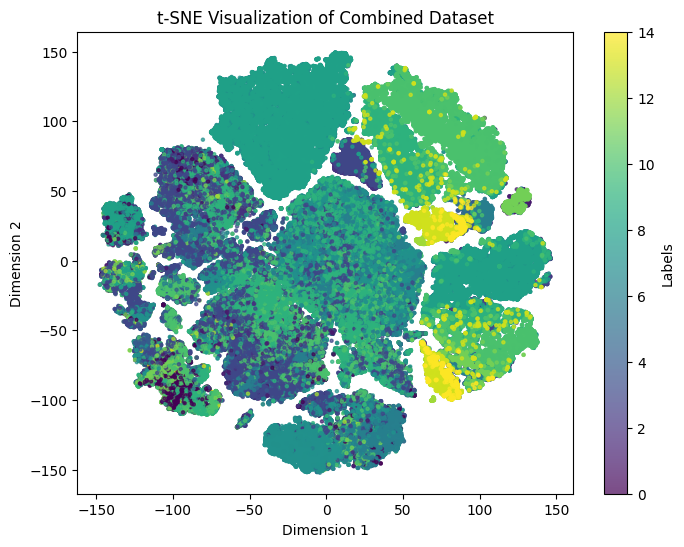

In [ ]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(X_labeled, y_labeled, x_unlabeled, y_unlab_pred):

    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):

    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Labels')
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    X_labeled=X_labeled,
    y_labeled=y_labeled,
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


# **T-SNE ON SEMI-SUPERVISED**

<ipython-input-166-0a653de81472>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors


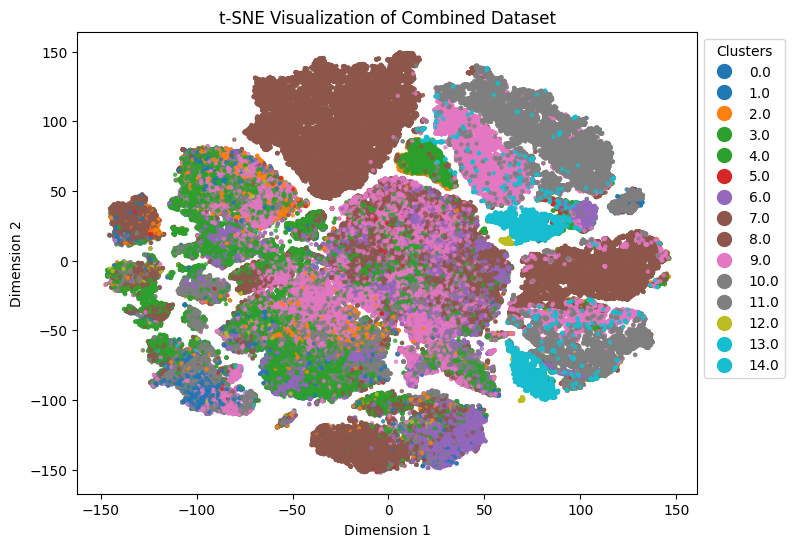

In [ ]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(X_labeled, y_labeled, x_unlabeled, y_unlab_pred):
    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization with distinct cluster colors
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    # Ensure labels are integers for discrete colormap
    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}

    # Map each label to a discrete color index
    discrete_colors = np.array([label_to_color[label] for label in labels])

    # Generate a discrete colormap
    cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=discrete_colors, cmap=cmap, s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10) for idx in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    X_labeled=X_labeled,
    y_labeled=y_labeled,
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot with distinct cluster colors
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


In [ ]:
pip install openTSNE


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


# **GRADIO**

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colormaps  # Import for the updated colormap handling
from tensorflow.keras.models import load_model

# Define function to generate predictions for unlabeled data
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """Generate predictions for unlabeled data."""
    x_unlab_encoded = encoder.predict(x_unlab)  # Encode unlabeled data
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)  # Predict with classifier
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)  # Get predicted class labels
    return y_unlab_pred

# Define the function for t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = colormaps.get_cmap('tab10')  # Get the colormap
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=discrete_colors,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig

# Define Gradio function to process and visualize
def process_and_visualize(start_row, end_row):
    """
    Process the `x_unlabeled` variable, predict labels, and visualize with t-SNE.
    Takes a range of rows as input from the user.
    """
    # Ensure x_unlabeled is preloaded
    global x_unlabeled

    # Convert input to integers
    start_row = int(start_row)
    end_row = int(end_row)

    # Select rows from x_unlabeled based on the provided range
    x_unlabeled_subset = x_unlabeled[start_row:end_row]

    # Ensure model and encoder are preloaded
    encoder = load_model(encoder_path)  # Load pre-trained encoder
    predictor = model_instance   # Assume predictor is already trained

    # Generate predictions
    predicted_labels = generate_unlabeled_predictions(x_unlabeled_subset, encoder, predictor)

    # Create t-SNE visualization
    tsne_plot = plot_tsne_opentsne(x_unlabeled_subset, predicted_labels, title="t-SNE Visualization of Input Data")

    # Return the visualization and predictions
    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Initialize Gradio Interface
inputs = [
    gr.Number(label="Start Row", value=3, precision=0),  # Input for the starting row
    gr.Number(label="End Row", value=109, precision=0)   # Input for the ending row
]

outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=inputs,  # Use the range inputs
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Automatically processes the `x_unlabeled` dataset for visualization and prediction."
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://846fc8246d1defb942.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
